In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('stroke_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


| Columna             | Descripción                                               | Tipo / Valores posibles                                                                 |
|---------------------|-----------------------------------------------------------|-----------------------------------------------------------------------------------------|
| `gender`            | Género del paciente                                       | `Male`, `Female`                                                             |
| `age`               | Edad del paciente en años                                 | Numérico (entero o flotante)                                                           |
| `hypertension`      | ¿Tiene hipertensión?                                      | `0`: No, `1`: Sí                                                                       |
| `heart_disease`     | ¿Tiene alguna enfermedad cardíaca?                        | `0`: No, `1`: Sí                                                                       |
| `ever_married`      | ¿Alguna vez ha estado casado/a?                           | `Yes`, `No`                                                                            |
| `work_type`         | Tipo de trabajo                                            | `Private`, `Self-employed`, `Govt_job`, `children`, `Never_worked`                    |
| `Residence_type`    | Tipo de residencia                                        | `Urban`, `Rural`                                                                       |
| `avg_glucose_level` | Nivel promedio de glucosa en sangre                       | Numérico (flotante)                                                                    |
| `bmi`               | Índice de masa corporal                                   | Numérico (flotante), puede contener valores nulos                                      |
| `smoking_status`    | Estado del hábito de fumar                                | `formerly smoked`, `never smoked`, `smokes`, `Unknown`                                |
| `stroke`            | ¿Ha sufrido un accidente cerebrovascular (ictus)?         | `0`: No, `1`: Sí                                                                       |


# Análisis general de las variables

🔢 Variables numéricas (continuas o discretas):

age (edad)

avg_glucose_level (nivel promedio de glucosa)

bmi (índice de masa corporal)

🔘 Variables categóricas binarias (0/1):
hypertension (hipertensión)

heart_disease (enfermedad cardíaca)

stroke (objetivo: ha tenido un ictus o no)

🔤 Variables categóricas nominales:
gender (género)

ever_married (alguna vez casado)

work_type (tipo de trabajo)

Residence_type (tipo de residencia)

smoking_status (estado del hábito de fumar)



In [4]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981,4981.000000,4981.000000,4981.000000,4981,4981,4981,4981.000000,4981.000000,4981,4981.000000
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2907,NaN,NaN,NaN,3280,2860,2532,NaN,NaN,1838,NaN
mean,NaN,43.419859,0.096165,0.055210,NaN,NaN,NaN,105.943562,28.498173,NaN,0.049789
std,NaN,22.662755,0.294848,0.228412,NaN,NaN,NaN,45.075373,6.790464,NaN,0.217531
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,14.000000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.230000,23.700000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.850000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,113.860000,32.600000,NaN,0.000000


# Análisis de variables numéricas

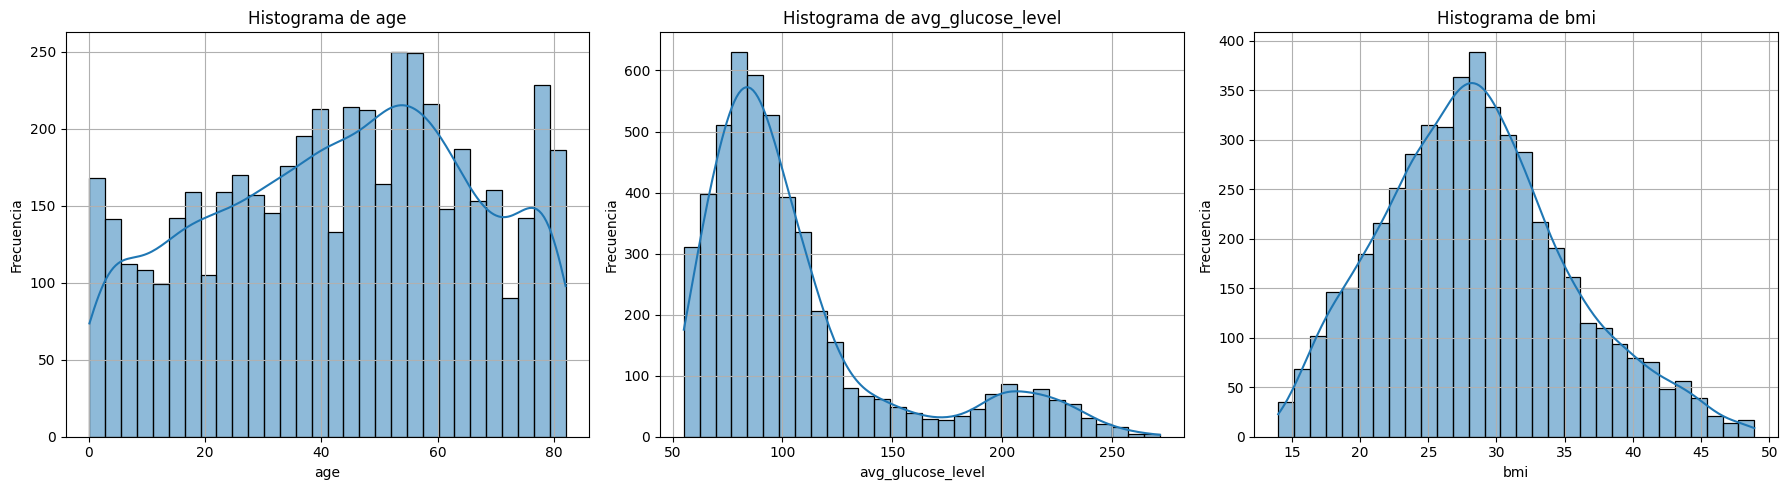

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas seleccionadas
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

# Crear figura y ejes: 1 fila, 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterar sobre columnas y ejes
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid()

# Ajustar espacio
plt.tight_layout()
plt.show()


Vamos a graficar las variables usando el percentil 95, asi en caso de que haya outliers podremos obtener una visión mas cercana a la distribución del grueso de los datos

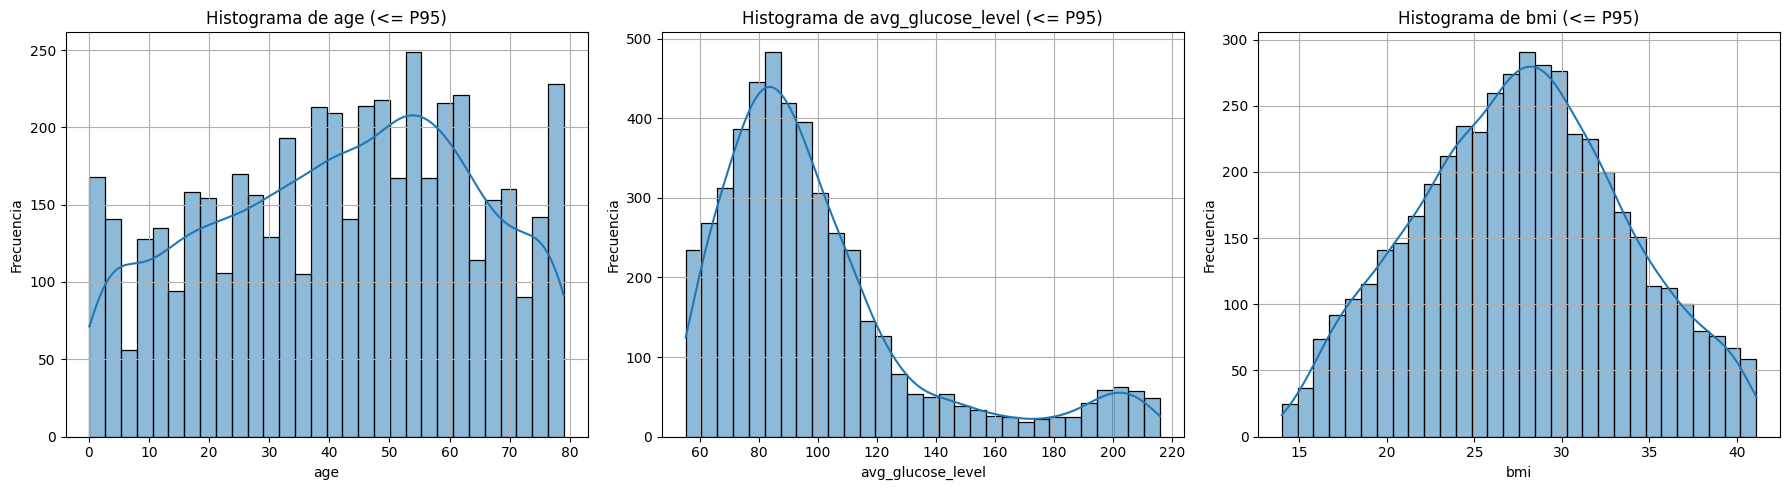

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas seleccionadas
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

# Crear figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterar y graficar en subplots
for i, column in enumerate(columns_to_plot):
    # Calcular percentil 95 y filtrar
    p95 = df[column].quantile(0.95)
    filtered_data = df[df[column] <= p95]
    
    # Graficar histograma
    sns.histplot(filtered_data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histograma de {column} (<= P95)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid()

plt.tight_layout()
plt.show()


Con esta primera aproximacion de las distribuciones tanto de los datos totales como los datos usando el percentil 95, podemos observar que los gráficos a penas varían. Esto podría significar que quizá no haya una presencia de outliers significativa, sin embargo, mas tarde profundizaremos más en este punto en la sección de outliers a través de los metodos IQR y Z-Score. 



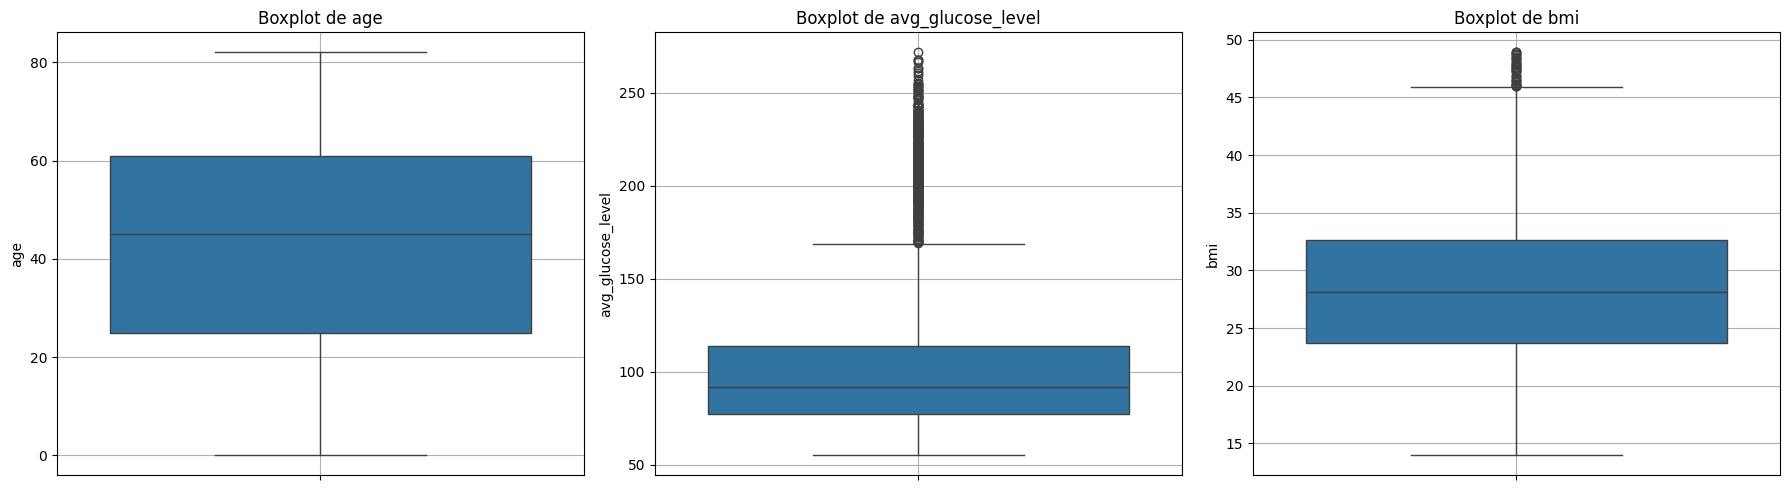

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas seleccionadas
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

# Crear figura y ejes: 1 fila, 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterar sobre columnas y ejes para crear los boxplots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_ylabel(column)
    axes[i].grid()

# Ajustar espaciado
plt.tight_layout()
plt.show()


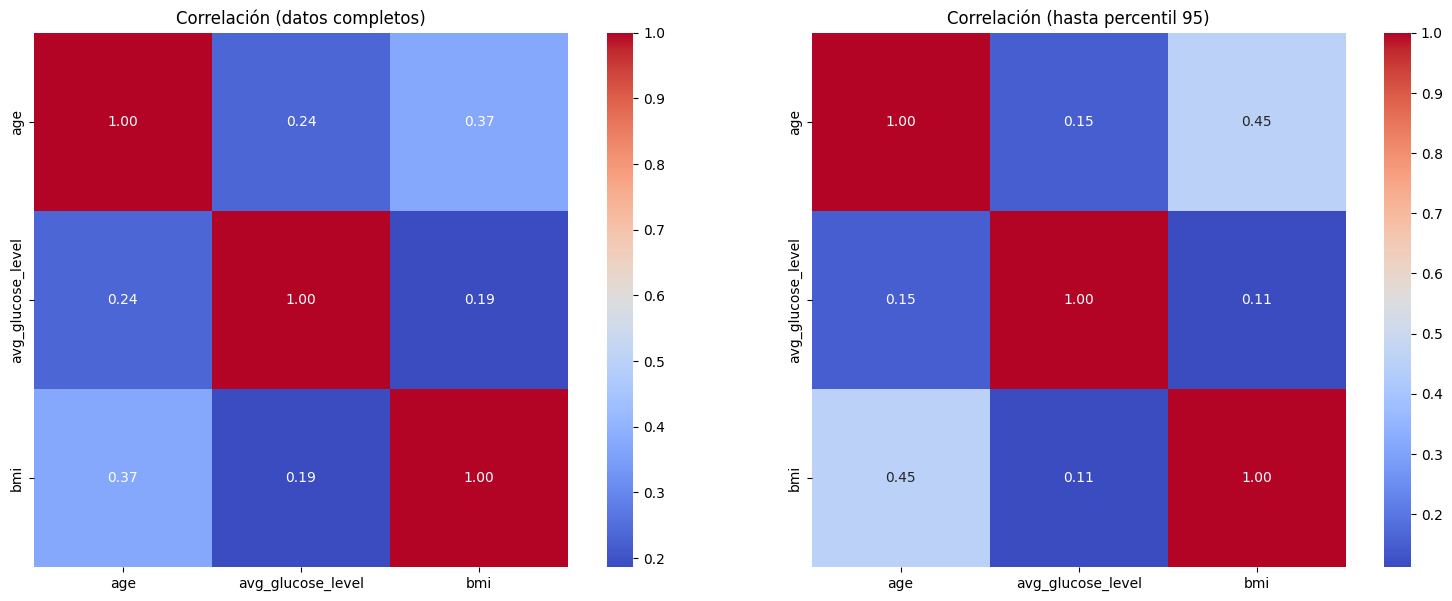

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas seleccionadas
columns_to_plot = ['age', 'avg_glucose_level', 'bmi']

# 1. Matriz de correlación completa
corr_full = df[columns_to_plot].corr()

# 2. Filtrar por percentil 95
df_filtered = df.copy()
for col in columns_to_plot:
    p95 = df[col].quantile(0.95)
    df_filtered = df_filtered[df_filtered[col] <= p95]

# 3. Matriz de correlación filtrada
corr_filtered = df_filtered[columns_to_plot].corr()

# 4. Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap completo
sns.heatmap(corr_full, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[0])
axes[0].set_title('Correlación (datos completos)')

# Heatmap filtrado al 95 percentil
sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[1])
axes[1].set_title('Correlación (hasta percentil 95)')

plt.tight_layout()
plt.show()


Tal como sucedía con los histogramas, los valores de nuestra matriz a penas cambian al usar el conjunto de datos totales y el percentil 95. La matriz nos muestra que únicamente hay correlaciones positivas, todas menores de 0.50, no siendo por tanto necesario descartar ninguna variable al no haber riesgo de correlación entre las mismas. La correlación más "fuerte" sucede en el par "age"-"bmi", lo que nos indica que cuanto mayor edad mayor indice de masa coorporal se presencia.

$BMI = \frac{peso\ (kg)}{altura\ (m)^2}$

Teniendo en cuenta la siguiente formula y sabiendo como hemos mencionado anteriormente que a cuanto mas edad mayor BMI, también se puede inferir que cuanto mayor es un paciente, mayor es su peso y por tanto mayor su BMI

# Análisis de variables categoricas

# V de cramer de variables categóricas 

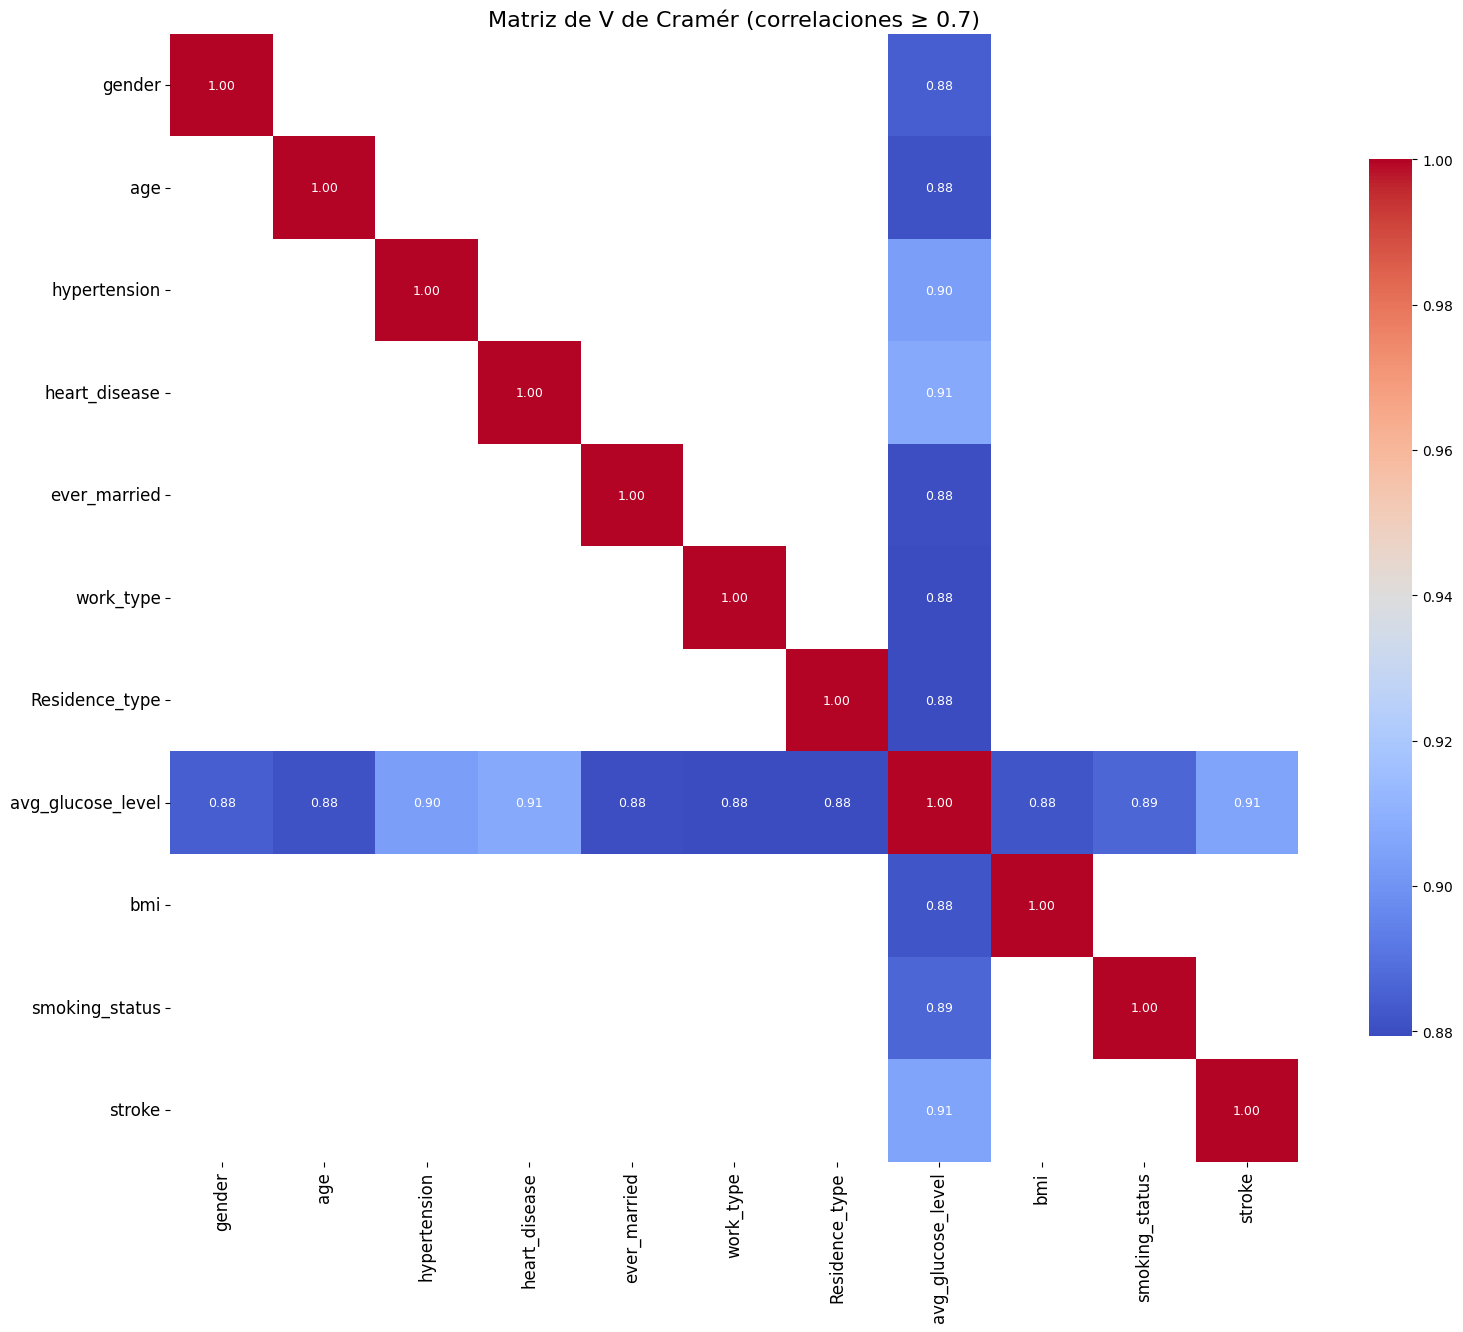

In [11]:
from itertools import combinations
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calcular V de Cramér para cada par de variables
for var1, var2 in combinations(df.columns, 2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Diagonal con 1s
np.fill_diagonal(matrix.values, 1)

# Convertir la matriz a tipo float
matrix = matrix.astype(float)

# Filtrar solo las relaciones con V de Cramér >= 0.8
high_corr_matrix = matrix[matrix >= 0.8]

# Eliminar filas y columnas completamente vacías (sin correlaciones > 0.8)
high_corr_matrix = high_corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualizar el heatmap solo con las variables que tienen correlaciones altas
plt.figure(figsize=(16, 14))  # Aumenta tamaño del gráfico
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            annot_kws={"size": 9}, cbar_kws={"shrink": 0.7})
plt.title("Matriz de V de Cramér (correlaciones ≥ 0.7)", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

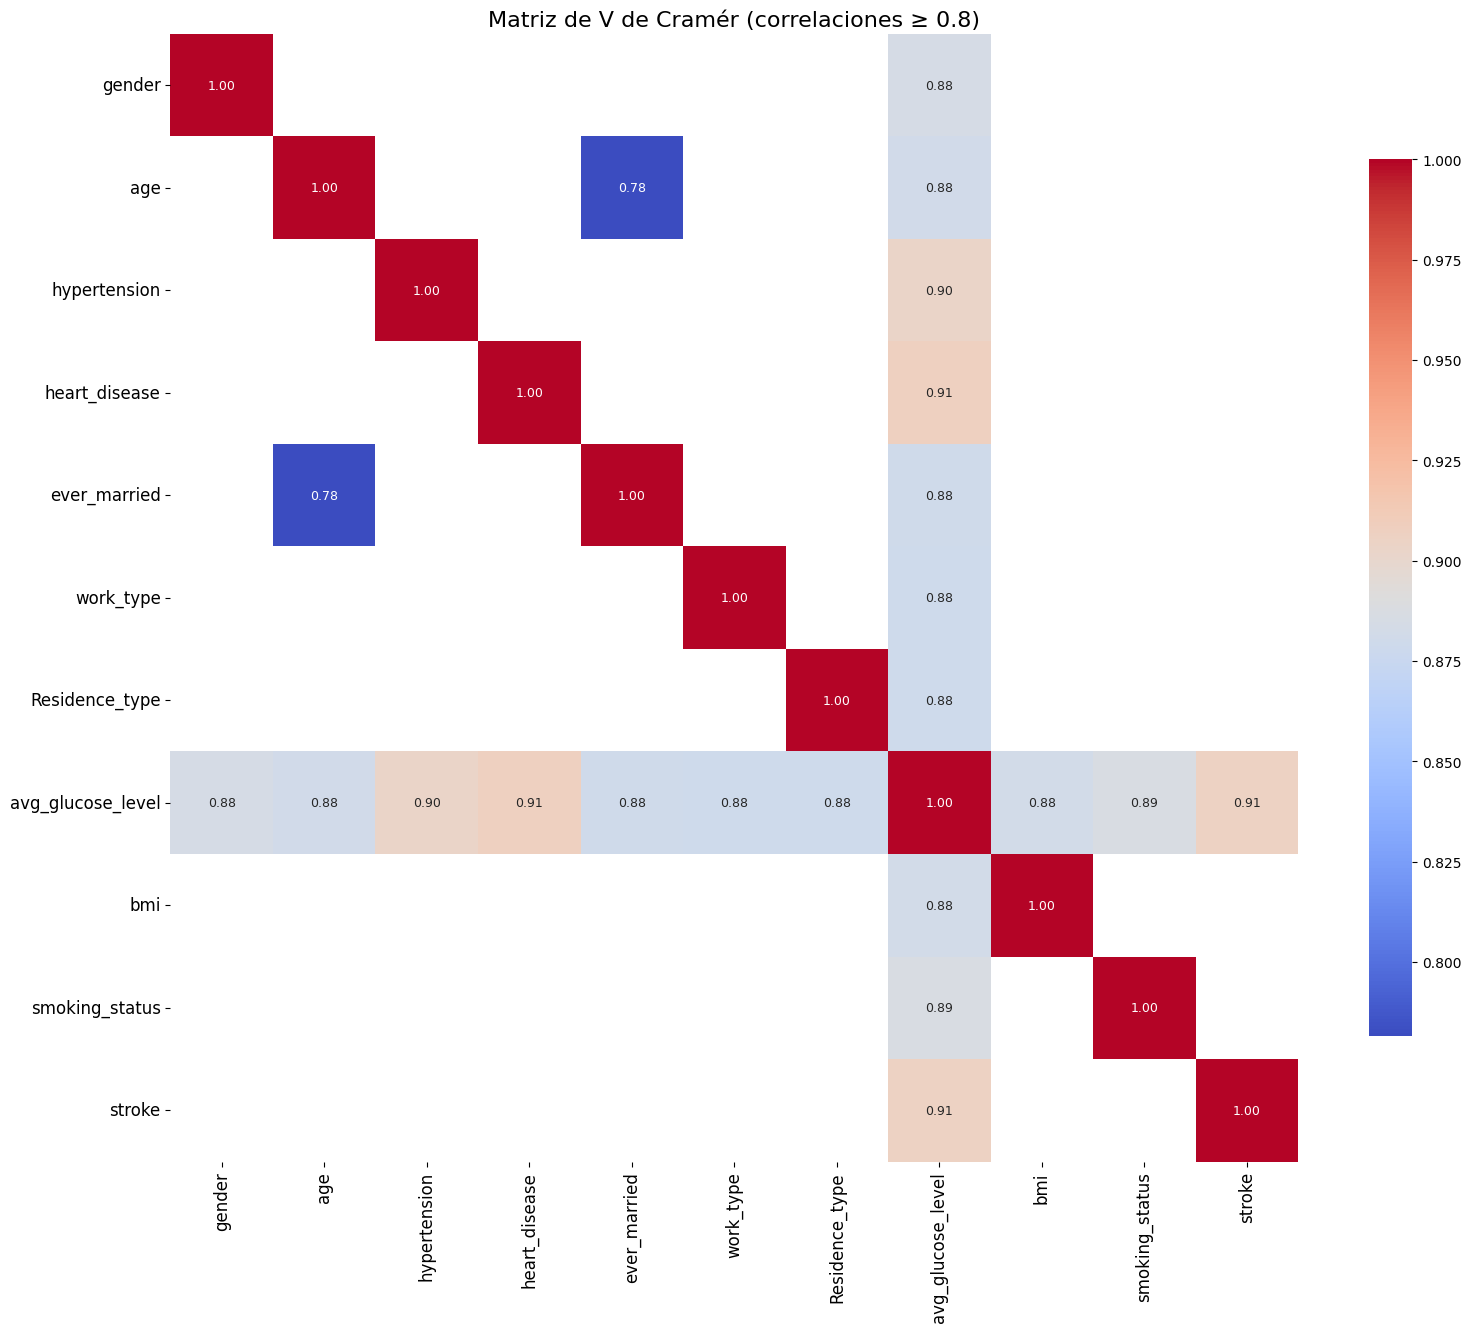

In [13]:
# Función para calcular V de Cramér
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

# Crear una matriz vacía para almacenar los valores de V de Cramér
matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calcular V de Cramér para cada par de variables
for var1, var2 in combinations(df.columns, 2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Diagonal con 1s
np.fill_diagonal(matrix.values, 1)

# Convertir la matriz a tipo float
matrix = matrix.astype(float)

# Filtrar solo las relaciones con V de Cramér >= 0.8
high_corr_matrix = matrix[matrix >= 0.70]

# Eliminar filas y columnas completamente vacías (sin correlaciones > 0.8)
high_corr_matrix = high_corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualizar el heatmap solo con las variables que tienen correlaciones altas
plt.figure(figsize=(16, 14))  # Aumenta tamaño del gráfico
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            annot_kws={"size": 9}, cbar_kws={"shrink": 0.7})
plt.title("Matriz de V de Cramér (correlaciones ≥ 0.8)", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

## Correlaciones fuertes (V de Cramér ≥ 0.88)

- `avg_glucose_level` y `heart_disease`: **0.91**
- `avg_glucose_level` y `stroke`: **0.91**
- `avg_glucose_level` y `hypertension`: **0.90**
- `avg_glucose_level` y `bmi`: **0.89**
- `avg_glucose_level` y `smoking_status`: **0.89**
- `avg_glucose_level` y `age`: **0.88**
- `avg_glucose_level` y `ever_married`: **0.88**
- `avg_glucose_level` y `work_type`: **0.88**
- `avg_glucose_level` y `Residence_type`: **0.88**
- `avg_glucose_level` y `gender`: **0.88**

In [15]:
# Función para calcular V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))  # corrección de bias
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Lista de columnas
lista = ["avg_glucose_level", "bmi", "hypertension", "heart_disease", 
         "ever_married", "work_type", "Residence_type", "smoking_status"]

# Calculamos número de categorías
n_categorias = df[lista].nunique()

# Calculamos V de Cramer con la variable 'class'
v_cramers = {col: cramers_v(df[col], df['stroke']) for col in lista}

# Crear DataFrame resumen
summary = pd.DataFrame({
    "n_categorias": n_categorias,
    "v_cramer_con_stroke": pd.Series(v_cramers)
}).sort_values(by="n_categorias", ascending=False)

summary

,n_categorias,v_cramer_con_stroke
avg_glucose_level,3895,0.194241
bmi,342,0.083926
smoking_status,4,0.071884
work_type,4,0.094880
heart_disease,2,0.131843
hypertension,2,0.129641
ever_married,2,0.106497
Residence_type,2,0.006455


# Analisis de outliers